In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dropouts = pd.read_csv('data/training_2009.csv')

In [3]:
dropouts

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,2,Fake record,WKEC,415,5194,Everett,Everett,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Fake record,GRREC,199,1648,Kingfisher,Kingfisher,0,Town: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Fake record,GRREC,142,1564,Diamond Lake,Diamond Lake,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,Fake record,OVEC,238,2230,Orange,Pike,0,Suburb: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Fake record,NKCES,517,7658,Foster,Kent,0,Rural: Fringe,2009,...,NaN,0.5491,0.2428,24458.5,271.53949,0.757102,0.375890,NaN,36100.0,0.591997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,Fake record,CKEC,262,3820,Oceanview,Burton,0,City: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52938,111985,Fake record,CKEC,289,3270,Universal,Jupiter,0,Town: Fringe,2009,...,NaN,0.4725,0.1686,19500.0,216.48997,0.662626,0.441241,NaN,32100.0,0.475793
52939,111986,Fake record,NKCES,541,7810,Cilian,Cilian,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52940,111988,Fake record,WKEC,421,5856,Zirvas,Rainbow,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dropouts.describe()

,sid,first_dist_code,first_hs_code,first_hs_alt,chrt_ninth,male,frpl,iep,ell,gifted,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
count,52942.000000,52942.000000,52942.000000,52942.000000,52942.0,52931.000000,52258.000000,52942.000000,52942.000000,52942.000000,...,7411.000000,21149.000000,21149.000000,20983.000000,20983.000000,21149.000000,13640.000000,7509.000000,21149.000000,21149.000000
mean,55852.370273,380.206528,5263.878131,0.053398,2009.0,0.520357,0.604022,0.113653,0.015791,0.190189,...,0.384539,0.473196,0.276767,19388.214507,215.248927,0.643495,0.472697,0.312635,32081.242612,0.530085
std,32377.301687,163.563276,2786.710570,0.224828,0.0,0.499590,0.489064,0.317392,0.124667,0.392454,...,0.057170,0.130927,0.151887,5198.379302,57.712667,0.149136,0.112298,0.099368,6327.732833,0.095979
min,2.000000,103.000000,1106.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.310300,0.044100,0.000700,5750.000000,63.836788,0.261312,0.159809,0.170209,20600.000000,0.309300
25%,27807.500000,238.000000,2850.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.328300,0.383100,0.172800,14642.500000,162.561770,0.466288,0.377848,0.251012,26300.000000,0.449474
50%,55795.500000,388.000000,5294.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.380100,0.459700,0.215000,20500.000000,227.592030,0.663946,0.432884,0.293832,33100.000000,0.541185
75%,83894.750000,538.000000,7492.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.431900,0.541300,0.422700,24093.000000,267.481690,0.778180,0.535935,0.398137,36100.000000,0.593796
max,111990.000000,613.000000,9902.000000,1.000000,2009.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.697000,0.907100,0.735600,34942.000000,387.927830,0.950102,0.923592,0.623265,60900.000000,0.793860


In [5]:
dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sid                              52942 non-null  int64  
 1   sid_type                         52942 non-null  object 
 2   first_coop_code                  52942 non-null  object 
 3   first_dist_code                  52942 non-null  int64  
 4   first_hs_code                    52942 non-null  int64  
 5   first_dist_name                  52942 non-null  object 
 6   first_hs_name                    52942 non-null  object 
 7   first_hs_alt                     52942 non-null  int64  
 8   first_hs_urbanicity              52484 non-null  object 
 9   chrt_ninth                       52942 non-null  int64  
 10  male                             52931 non-null  float64
 11  race_ethnicity                   52257 non-null  object 
 12  frpl              

In [6]:
#the features selected in this dataframe are those used in a previous study at the Harvard Center for Education Policy and the Stategic Data Project
fs_dropouts = dropouts[["sid","dropout",
              "male",
              "race_ethnicity",
              "first_hs_urbanicity",
              "math_ss",
              "read_ss",
              "scale_score_11_math",
              "scale_score_11_read",
              "gifted",
              "ever_alternative",
              "iep",
              "pct_days_absent",
              "gpa",
              "frpl",
              "ell"]]

### Let's define these features (https://hwpi.harvard.edu/files/sdp/files/step_1_stata_identify_data_specification_guide.pdf)

    - "dropout" - target variable, whether or not student dropped out,
    - "male",
    - "race_ethnicity",
    - "math_ss" - math standardized test score,
    - "read_ss" - reading standardized test score,
    - "gifted" - whether student was ever enrolled in a gifted program,
    - "ever_alternative" - whether student was ever enrolled in a alternative program,
    - "iep" - whether student was ever assigned an individualized education plan,
    - "pct_days_absent" - percent days absent,
    - "gpa" - student grade point average,
    - "frpl" - whether student was ever in federal free or reduced price lunch program,
    - "ell" - whether student was ever enrolled in an english language learner(english as second language) program

In [7]:
fs_dropouts

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,Town: Remote,NaN,NaN,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0
1,5,0,0.0,White,Town: Distant,18.0,46.0,16.0,18.0,0,0,0,0.969005,2.822795,1.0,0
2,12,1,0.0,White,Rural: Distant,18.0,35.0,NaN,NaN,0,1,0,4.746706,0.330000,0.0,0
3,13,0,0.0,White,Suburb: Large,48.0,80.0,23.0,27.0,0,0,1,6.850071,2.985000,1.0,0
4,14,0,1.0,White,Rural: Fringe,18.0,30.0,16.0,14.0,0,0,0,5.802631,2.118500,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,0,1.0,African-American,City: Large,34.0,44.0,16.0,15.0,0,1,1,9.833898,2.079800,1.0,0
52938,111985,0,0.0,White,Town: Fringe,23.0,51.0,16.0,20.0,1,1,0,2.291429,3.443500,0.0,0
52939,111986,0,1.0,White,Rural: Distant,4.0,18.0,15.0,8.0,0,0,1,7.766962,1.695142,1.0,0
52940,111988,1,1.0,African-American,Town: Remote,29.0,34.0,15.0,19.0,0,1,0,15.343004,1.567000,1.0,0


In [8]:
fs_dropouts.describe()

,sid,dropout,male,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
count,52942.000000,52942.000000,52931.000000,43953.000000,43967.000000,43042.000000,43022.000000,52942.000000,52942.000000,52942.000000,52855.000000,51720.000000,52258.000000,52942.000000
mean,55852.370273,0.186789,0.520357,41.362933,47.455956,19.008712,19.800753,0.190189,0.274262,0.113653,8.436930,2.631160,0.604022,0.015791
std,32377.301687,0.389746,0.499590,21.401209,16.414730,4.661263,5.798392,0.392454,0.446146,0.317392,16.322560,0.853238,0.489064,0.124667
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27807.500000,0.000000,0.000000,26.000000,37.000000,16.000000,15.000000,0.000000,0.000000,0.000000,3.188880,2.044000,0.000000,0.000000
50%,55795.500000,0.000000,1.000000,42.000000,47.000000,17.000000,19.000000,0.000000,0.000000,0.000000,6.079365,2.694000,1.000000,0.000000
75%,83894.750000,0.000000,1.000000,57.000000,58.000000,22.000000,24.000000,0.000000,1.000000,0.000000,10.794286,3.306613,1.000000,0.000000
max,111990.000000,1.000000,1.000000,183.000000,177.000000,36.000000,36.000000,1.000000,1.000000,1.000000,3153.000000,4.000000,1.000000,1.000000


In [9]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52942 non-null  int64  
 1   dropout              52942 non-null  int64  
 2   male                 52931 non-null  float64
 3   race_ethnicity       52257 non-null  object 
 4   first_hs_urbanicity  52484 non-null  object 
 5   math_ss              43953 non-null  float64
 6   read_ss              43967 non-null  float64
 7   scale_score_11_math  43042 non-null  float64
 8   scale_score_11_read  43022 non-null  float64
 9   gifted               52942 non-null  int64  
 10  ever_alternative     52942 non-null  int64  
 11  iep                  52942 non-null  int64  
 12  pct_days_absent      52855 non-null  float64
 13  gpa                  51720 non-null  float64
 14  frpl                 52258 non-null  float64
 15  ell                  52942 non-null 

Notes: 

There are missing values for male(11), race_ethnicity(685), math_ss(8989), read_ss(8975), pct_days_absent(87), gpa(1222), and frpl(684)

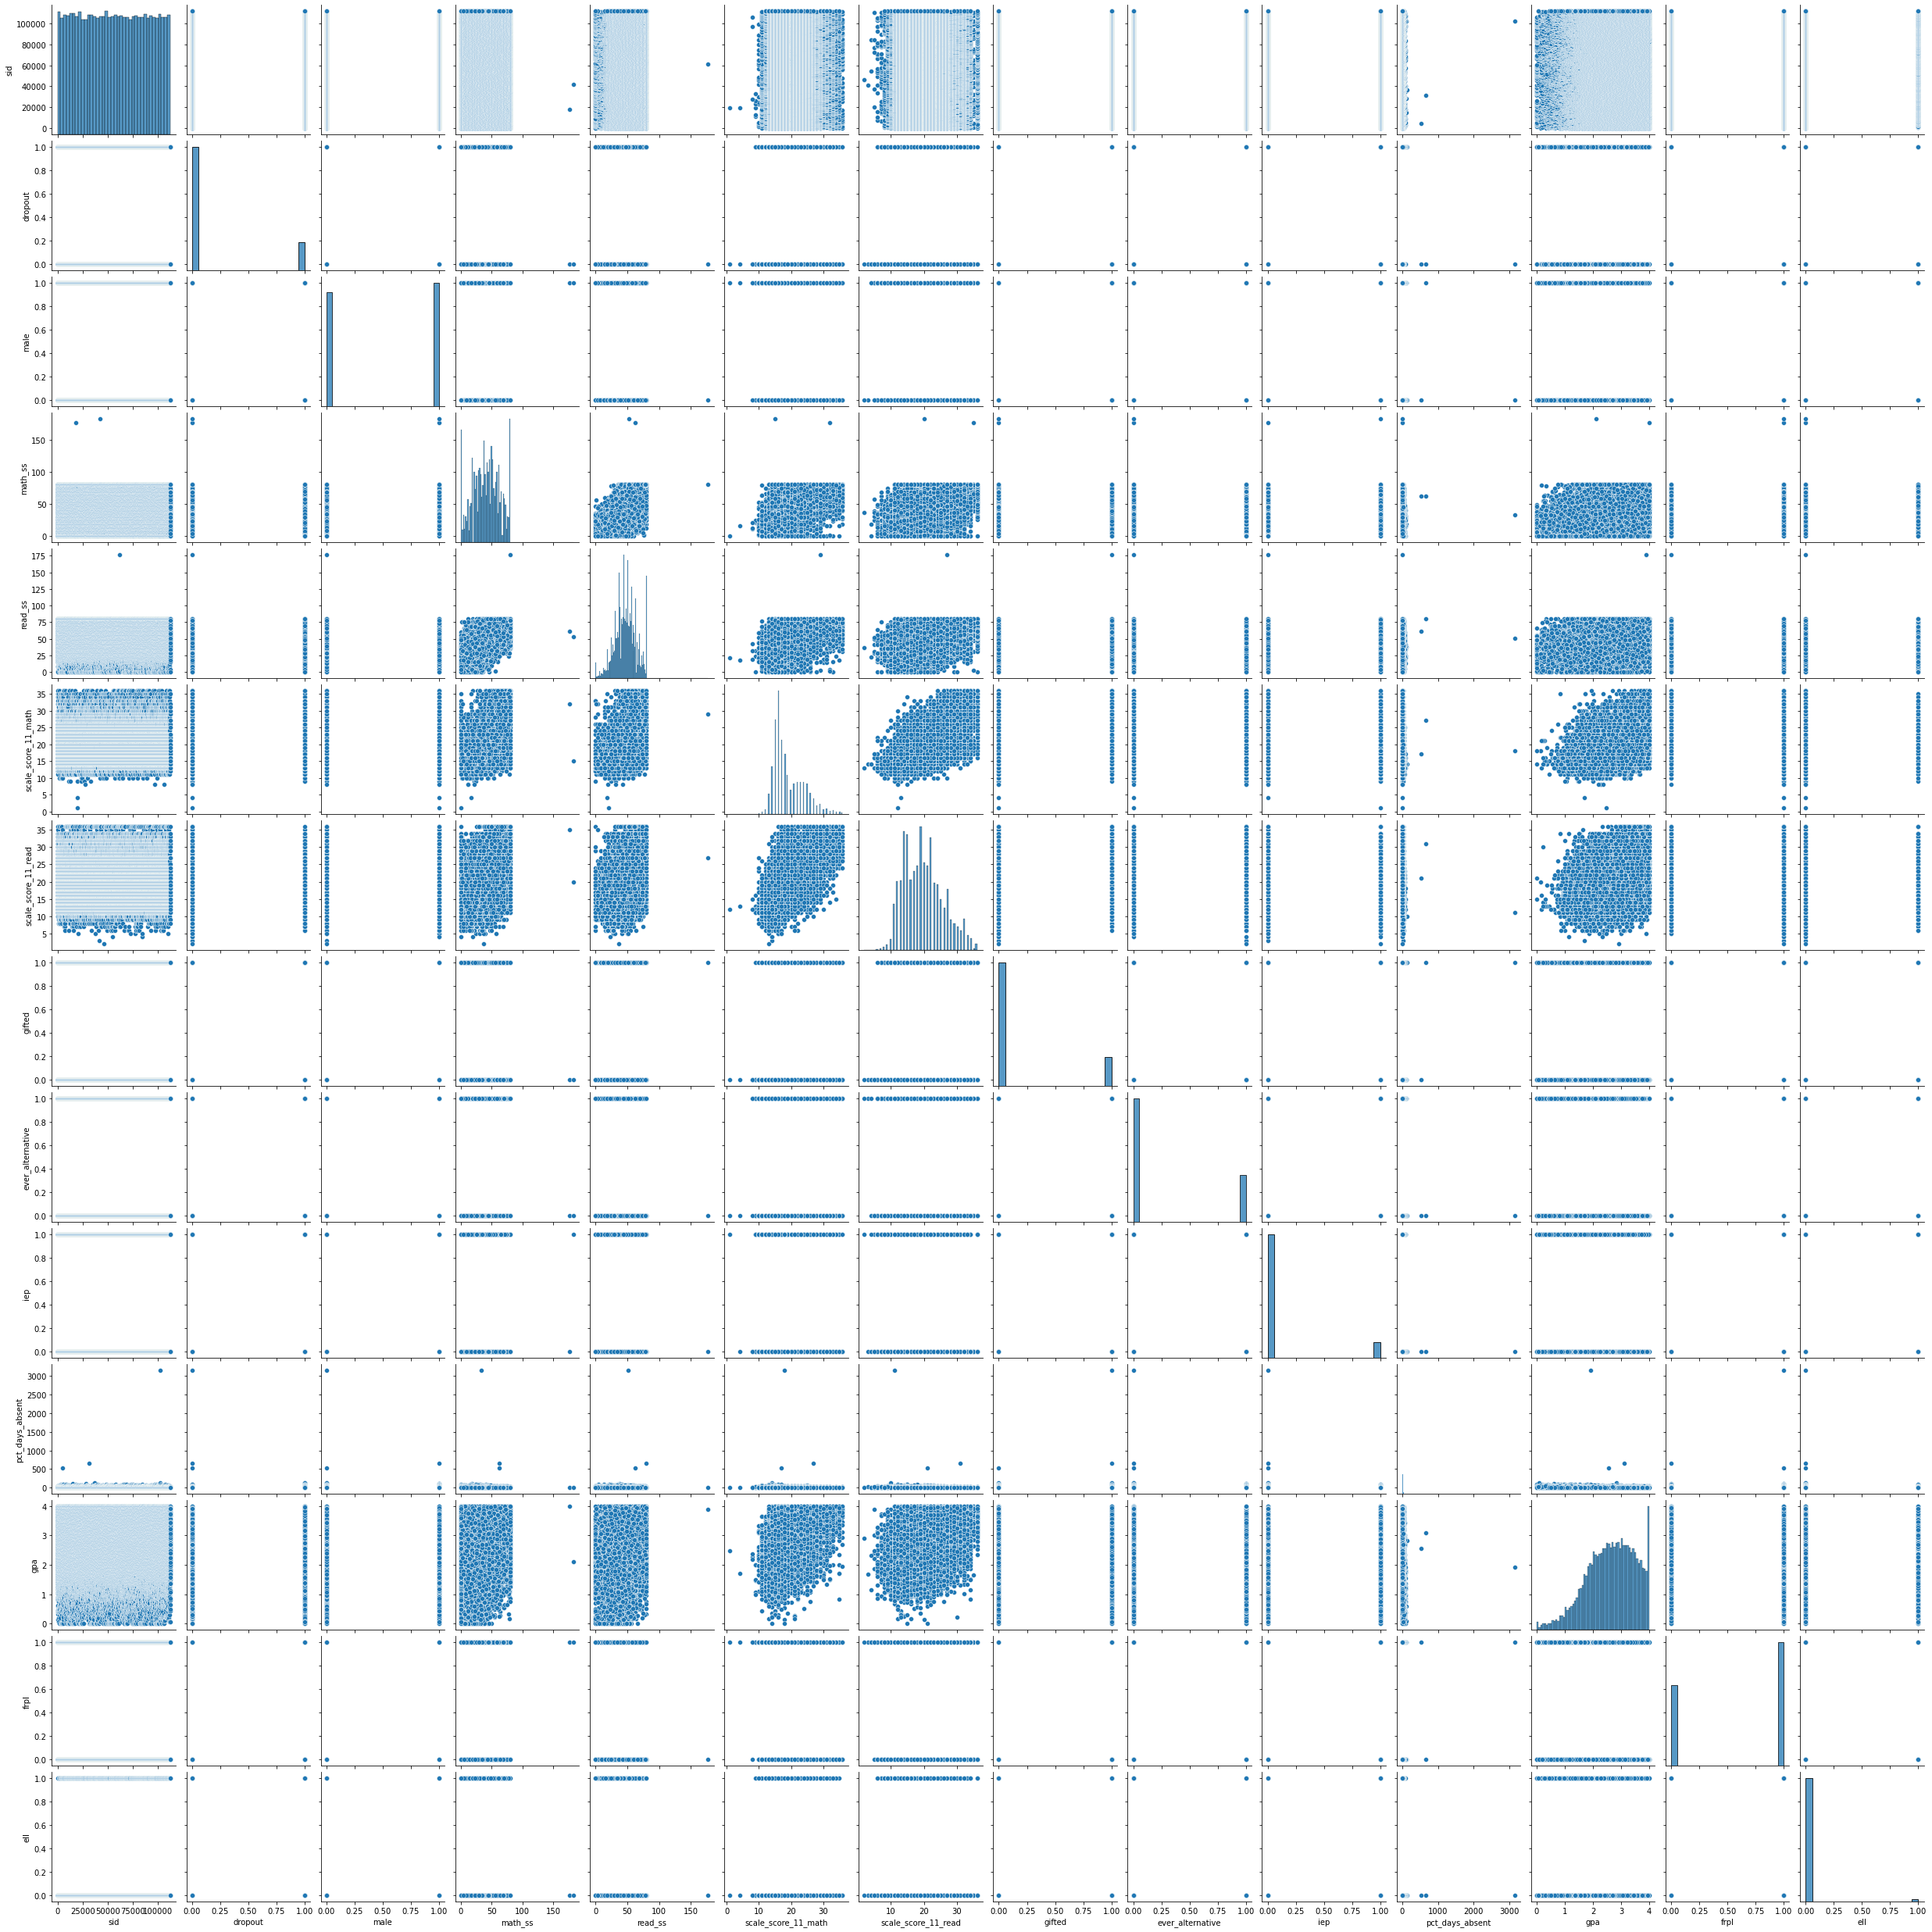

In [10]:
#sns.pairplot(fs_dropouts)

This tells us a couple of things:

- most of the data is categorical, with many of the features being binary categorical --> probably better to do a 
- you would think gpa and standardized testing scores would have some kind of relationship, but at first glance there doesn't appear to be any (however there are some pretty significant outlier that may be skewing the data
- notice the distributions of the ss scores and the gpa
- the race data is missing because it is string values(it is still categorical though, so we will have to dummized it
- at this first juncture it looks like the pct_days_absent feature has the strongest correlation with whether or not a student graduates

In [9]:
fs_dropouts['dropout'].value_counts()

0    43053
1     9889
Name: dropout, dtype: int64

In [10]:
fs_dropouts[fs_dropouts['dropout'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell


/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dropout', ylabel='count'>

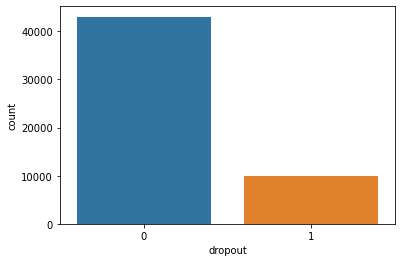

In [11]:
sns.countplot(fs_dropouts["dropout"])

In [12]:
fs_dropouts['dropout'].value_counts()[1]/len(fs_dropouts['dropout'])

0.1867893166106305

Note: we can see the target class is imbalanced(only ~19% are dropouts), so we'll have to account for this when modelling

(array([ 533.,  802., 1747., 3165., 5787., 7624., 8410., 8506., 7855.,
        7291.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

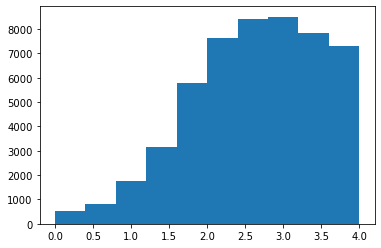

In [13]:
#let's look a little closer at gpa
plt.hist(fs_dropouts['gpa'])

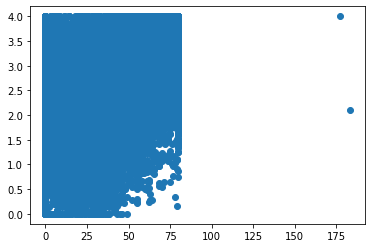

In [14]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa'])

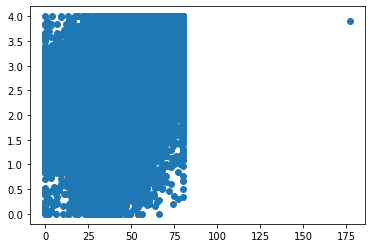

In [15]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

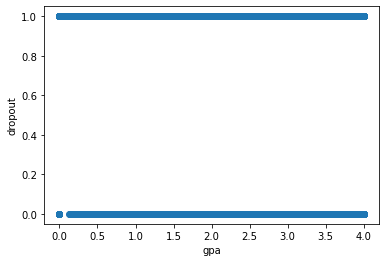

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('gpa')
ax.set_ylabel('dropout')
ax.scatter(fs_dropouts['gpa'], fs_dropouts['dropout'])

let's look at standardized test scores

In [17]:
fs_dropouts[fs_dropouts['math_ss'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,Town: Remote,NaN,NaN,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0
7,19,1,1.0,White,NaN,NaN,NaN,NaN,NaN,0,1,0,2.949704,NaN,0.0,0
19,50,0,1.0,White,City: Large,NaN,NaN,18.0,19.0,0,0,0,2.218260,2.805150,1.0,0
37,89,0,0.0,White,Town: Remote,NaN,NaN,16.0,27.0,0,0,0,9.629684,3.059000,1.0,0
42,94,0,1.0,White,Rural: Remote,NaN,NaN,15.0,21.0,0,0,0,3.703593,3.569500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52922,111960,0,1.0,White,Suburb: Small,NaN,NaN,14.0,12.0,0,0,0,9.482759,1.718833,1.0,0
52929,111971,0,0.0,African-American,Rural: Distant,NaN,NaN,NaN,NaN,0,1,0,5.523810,1.365000,1.0,0
52930,111972,1,1.0,White,Suburb: Large,NaN,NaN,NaN,NaN,0,0,0,29.800001,2.000000,0.0,0
52933,111976,0,0.0,White,NaN,NaN,NaN,NaN,NaN,0,1,0,18.629631,2.702367,1.0,0


So the question is what to do with these null...it might be indicative if the values are missing, so we'll have an indicator for missingness. Test scores can't be negative, so let's fill them with negative one. 

In [18]:
fs_dropouts['math_ss'].fillna(-1, inplace=True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [19]:
fs_dropouts['math_ss'].value_counts()

-1.0      8989
 80.0     2035
 0.0      1886
 49.0     1048
 39.0     1044
          ... 
 15.0       97
 3.0        81
 20.0        3
 177.0       1
 183.0       1
Name: math_ss, Length: 84, dtype: int64

In [20]:
fs_dropouts[fs_dropouts['math_ss'] > 100] #<--note it is impossible for math scores to be this high(highest score is 100)

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
8773,18336,0,1.0,White,Suburb: Large,177.0,62.0,32.0,35.0,0,0,0,0.827389,4.0000,1.0,0
19990,42106,0,1.0,White,Rural: Fringe,183.0,53.0,15.0,20.0,0,0,1,14.306123,2.1023,1.0,0


let's drop those rows (it looks like a 1 typo, but I would risk poorly informing the data if I just "fixed" myself, and considering thise is old, anonymized data, I wouldn't be able to figure out the real vals anyway)

In [21]:
fs_dropouts = fs_dropouts[fs_dropouts['math_ss'] < 100]

In [22]:
fs_dropouts['math_ss'].value_counts()

-1.0     8989
 80.0    2035
 0.0     1886
 49.0    1048
 39.0    1044
         ... 
 67.0     120
 17.0     112
 15.0      97
 3.0       81
 20.0       3
Name: math_ss, Length: 82, dtype: int64

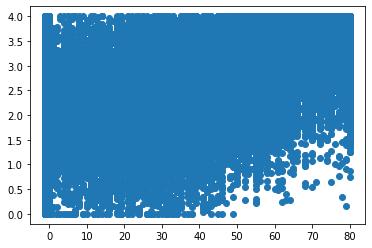

In [23]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa']) #this makes things a little more approachable, specifically the bottom right corner

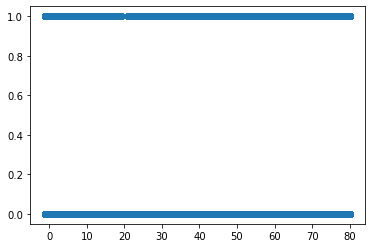

In [24]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['dropout']) 

let's do the same for reading scores

In [25]:
#first find reading scores that are empty
fs_dropouts[fs_dropouts['read_ss'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,Town: Remote,-1.0,NaN,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0
7,19,1,1.0,White,NaN,-1.0,NaN,NaN,NaN,0,1,0,2.949704,NaN,0.0,0
19,50,0,1.0,White,City: Large,-1.0,NaN,18.0,19.0,0,0,0,2.218260,2.805150,1.0,0
37,89,0,0.0,White,Town: Remote,-1.0,NaN,16.0,27.0,0,0,0,9.629684,3.059000,1.0,0
42,94,0,1.0,White,Rural: Remote,-1.0,NaN,15.0,21.0,0,0,0,3.703593,3.569500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52929,111971,0,0.0,African-American,Rural: Distant,-1.0,NaN,NaN,NaN,0,1,0,5.523810,1.365000,1.0,0
52930,111972,1,1.0,White,Suburb: Large,-1.0,NaN,NaN,NaN,0,0,0,29.800001,2.000000,0.0,0
52931,111973,1,0.0,White,Town: Distant,0.0,NaN,NaN,NaN,0,1,0,16.078279,NaN,1.0,0
52933,111976,0,0.0,White,NaN,-1.0,NaN,NaN,NaN,0,1,0,18.629631,2.702367,1.0,0


In [26]:
fs_dropouts['read_ss'].fillna(-1, inplace = True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [27]:
fs_dropouts['read_ss'].value_counts()

-1.0      8975
 80.0     1905
 39.0     1332
 45.0     1301
 48.0     1297
          ... 
 5.0        37
 3.0        32
 1.0        30
 2.0        24
 177.0       1
Name: read_ss, Length: 83, dtype: int64

In [28]:
fs_dropouts[fs_dropouts['read_ss'] > 100] 

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
29195,61506,0,0.0,White,Rural: Fringe,80.0,177.0,29.0,27.0,1,0,0,1.657515,3.898,0.0,0


In [31]:
fs_dropouts = fs_dropouts[fs_dropouts['read_ss'] < 100]

In [32]:
fs_dropouts['read_ss'].value_counts()

-1.0     8975
 80.0    1905
 39.0    1332
 45.0    1301
 48.0    1297
         ... 
 8.0       42
 5.0       37
 3.0       32
 1.0       30
 2.0       24
Name: read_ss, Length: 82, dtype: int64

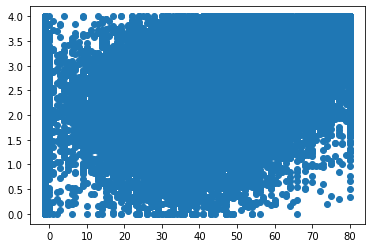

In [33]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

Let's do the same for 11th grade math and reading scores as well

In [29]:
#first find scores that are empty
#fs_dropouts[fs_dropouts['scale_score_11_math'].isnull()]
fs_dropouts[fs_dropouts['scale_score_11_read'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
2,12,1,0.0,White,Rural: Distant,18.0,35.0,NaN,NaN,0,1,0,4.746706,0.330000,0.0,0
7,19,1,1.0,White,NaN,-1.0,-1.0,NaN,NaN,0,1,0,2.949704,NaN,0.0,0
8,21,0,1.0,African-American,Town: Distant,0.0,24.0,NaN,NaN,0,1,1,24.675926,2.020500,1.0,0
11,30,1,0.0,White,Rural: Distant,55.0,66.0,NaN,NaN,0,1,0,13.785586,3.173095,1.0,0
22,54,1,0.0,White,City: Large,72.0,66.0,NaN,NaN,1,1,0,7.451411,3.648700,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,111952,1,0.0,African-American,City: Small,0.0,48.0,NaN,NaN,0,1,1,6.518249,2.753710,1.0,0
52929,111971,0,0.0,African-American,Rural: Distant,-1.0,-1.0,NaN,NaN,0,1,0,5.523810,1.365000,1.0,0
52930,111972,1,1.0,White,Suburb: Large,-1.0,-1.0,NaN,NaN,0,0,0,29.800001,2.000000,0.0,0
52931,111973,1,0.0,White,Town: Distant,0.0,-1.0,NaN,NaN,0,1,0,16.078279,NaN,1.0,0


In [30]:
#fill the nans
fs_dropouts['scale_score_11_math'].fillna(-1, inplace = True)
fs_dropouts['scale_score_11_read'].fillna(-1, inplace = True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [31]:
fs_dropouts['scale_score_11_math'].value_counts()
fs_dropouts['scale_score_11_read'].value_counts()

-1.0     9920
 19.0    3459
 14.0    3333
 15.0    3243
 22.0    3156
 20.0    2444
 21.0    2374
 18.0    2366
 17.0    2202
 16.0    1977
 13.0    1948
 12.0    1936
 23.0    1879
 24.0    1848
 27.0    1708
 25.0    1427
 11.0    1298
 26.0    1186
 32.0     869
 28.0     843
 29.0     752
 30.0     657
 31.0     549
 33.0     403
 34.0     326
 10.0     309
 36.0     179
 9.0      158
 8.0       73
 35.0      46
 7.0       38
 6.0       24
 5.0        6
 4.0        2
 2.0        1
 3.0        1
Name: scale_score_11_read, dtype: int64

In [41]:
pd.crosstab(fs_dropouts['scale_score_11_math'], fs_dropouts['dropout'])


dropout,0,1
scale_score_11_math,,
-1.0,2519,7381
1.0,1,0
4.0,1,0
8.0,3,0
9.0,4,2
10.0,20,2
11.0,135,13
12.0,252,35
13.0,1082,134


In [33]:
pd.crosstab(fs_dropouts['scale_score_11_read'], fs_dropouts['dropout'])

dropout,0,1
scale_score_11_read,,
-1.0,2533,7387
2.0,1,0
3.0,1,0
4.0,2,0
5.0,6,0
6.0,22,2
7.0,34,4
8.0,63,10
9.0,146,12


In [43]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52940 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52940 non-null  int64  
 1   dropout              52940 non-null  int64  
 2   male                 52929 non-null  float64
 3   race_ethnicity       52255 non-null  object 
 4   first_hs_urbanicity  52482 non-null  object 
 5   math_ss              52940 non-null  float64
 6   read_ss              52940 non-null  float64
 7   scale_score_11_math  52940 non-null  float64
 8   scale_score_11_read  52940 non-null  float64
 9   gifted               52940 non-null  int64  
 10  ever_alternative     52940 non-null  int64  
 11  iep                  52940 non-null  int64  
 12  pct_days_absent      52853 non-null  float64
 13  gpa                  51718 non-null  float64
 14  frpl                 52256 non-null  float64
 15  ell                  52940 non-null 

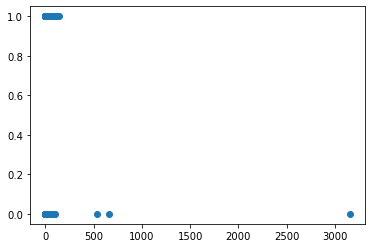

In [44]:
#Let's also look at pct days absent vs dropouts
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout'])

again...let's look at the nulls

In [45]:
fs_dropouts['pct_days_absent'].value_counts()

0.000000     1278
7.692308       15
9.000000       15
10.000000      14
12.500000      14
             ... 
21.578947       1
4.886819        1
33.790951       1
2.994169        1
1.307801        1
Name: pct_days_absent, Length: 32213, dtype: int64

In [46]:
fs_dropouts[fs_dropouts['pct_days_absent'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
1219,2491,0,1.0,White,Suburb: Large,29.0,10.0,16.0,14.0,0,0,1,NaN,2.150000,1.0,0
3660,7639,0,1.0,NaN,NaN,-1.0,-1.0,14.0,8.0,0,1,0,NaN,3.200000,0.0,0
3747,7789,0,0.0,White,Rural: Distant,-1.0,-1.0,24.0,30.0,1,0,0,NaN,3.950000,0.0,0
4214,8827,0,0.0,White,Town: Distant,-1.0,-1.0,15.0,12.0,0,0,0,NaN,1.643000,1.0,0
4661,9778,0,1.0,Multiple/Native American,Town: Distant,-1.0,-1.0,22.0,30.0,0,1,0,NaN,3.273250,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49050,103790,0,1.0,African-American,City: Large,-1.0,-1.0,18.0,29.0,0,1,0,NaN,3.000000,1.0,0
49299,104345,1,0.0,Hispanic,City: Large,-1.0,-1.0,-1.0,-1.0,0,1,0,NaN,1.913000,1.0,0
49431,104605,0,1.0,White,NaN,-1.0,-1.0,15.0,17.0,0,1,0,NaN,NaN,NaN,0
50035,105824,1,1.0,African-American,City: Large,-1.0,-1.0,-1.0,-1.0,1,1,0,NaN,NaN,0.0,0


In [47]:
#because days can't be neg, I'll indicate missingness here again as neg 1
fs_dropouts['pct_days_absent'].fillna(-1, inplace=True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [48]:
fs_dropouts[fs_dropouts['pct_days_absent'].isnull()]

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell


In [49]:
fs_dropouts['pct_days_absent'].value_counts()

 0.000000     1278
-1.000000       87
 7.692308       15
 9.000000       15
 12.500000      14
              ... 
 21.578947       1
 4.886819        1
 33.790951       1
 2.994169        1
 2.965962        1
Name: pct_days_absent, Length: 32214, dtype: int64

Ok, this is PERCENT days absent, so anything over 100 is not possible...so let's just drop those

In [50]:
fs_dropouts[fs_dropouts['pct_days_absent'] > 100] 

,sid,dropout,male,race_ethnicity,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
2239,4673,0,0.0,Multiple/Native American,Suburb: Large,62.0,62.0,17.0,21.0,0,0,0,533.18750,2.556000,1.0,0
7230,15094,1,1.0,African-American,Suburb: Large,18.0,38.0,-1.0,-1.0,0,1,0,118.05007,NaN,1.0,0
13560,28479,1,1.0,White,City: Large,-1.0,-1.0,-1.0,-1.0,0,1,0,116.98468,0.602933,0.0,0
14853,31247,0,1.0,White,Rural: Fringe,62.0,80.0,27.0,31.0,1,0,0,657.59998,3.101000,0.0,0
17304,36385,1,0.0,African-American,Suburb: Mid-size,-1.0,-1.0,14.0,10.0,1,0,0,140.41096,2.827000,NaN,0
48195,101921,0,0.0,White,Rural: Fringe,33.0,51.0,18.0,11.0,1,0,0,3153.00000,1.917000,1.0,0
48395,102334,1,0.0,African-American,Suburb: Small,-1.0,-1.0,-1.0,-1.0,0,0,0,124.07428,0.083220,NaN,0


In [51]:
fs_dropouts = fs_dropouts[fs_dropouts['pct_days_absent'] < 100]

In [52]:
fs_dropouts['pct_days_absent'].value_counts()

 0.000000     1278
-1.000000       87
 9.000000       15
 7.692308       15
 12.500000      14
              ... 
 4.886819        1
 33.790951       1
 2.994169        1
 1.834564        1
 11.994334       1
Name: pct_days_absent, Length: 32207, dtype: int64

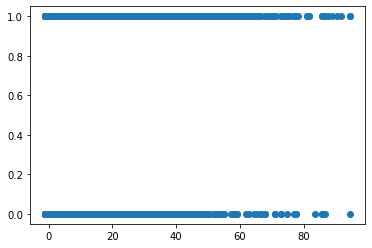

In [53]:
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout']) #this looks a lot more informative

In [54]:
fs_dropouts['race_ethnicity'].value_counts()

White                       42377
African-American             6549
Hispanic                     1709
Multiple/Native American      939
Asian/Pacific Islander        674
Name: race_ethnicity, dtype: int64

In [55]:
def ethnicity_to_numeric(x):
        if x=='White': 
            return 0
        elif x=='African-American':   
            return 1
        elif x=='Hispanic':
            return 2
        elif x=='Multiple/Native American':
            return 3
        elif x=='Asian/Pacific Islander':
            return 4
        else:
            return -1 #if race is null/missing it is accounted for

In [56]:
fs_dropouts['race_num'] = fs_dropouts['race_ethnicity'].apply(ethnicity_to_numeric)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
fs_dropouts.drop('race_ethnicity', axis=1, inplace=True) #now that we have the numerical race column, we can get rid of original

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let's look at race_num against the other cols

In [58]:
fs_dropouts['race_num'].value_counts()

 0    42377
 1     6549
 2     1709
 3      939
-1      685
 4      674
Name: race_num, dtype: int64

Let's look at the dataset again and see if things are clean and good to go

In [59]:
fs_dropouts

,sid,dropout,male,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
0,2,0,0.0,Town: Remote,-1.0,-1.0,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0,0
1,5,0,0.0,Town: Distant,18.0,46.0,16.0,18.0,0,0,0,0.969005,2.822795,1.0,0,0
2,12,1,0.0,Rural: Distant,18.0,35.0,-1.0,-1.0,0,1,0,4.746706,0.330000,0.0,0,0
3,13,0,0.0,Suburb: Large,48.0,80.0,23.0,27.0,0,0,1,6.850071,2.985000,1.0,0,0
4,14,0,1.0,Rural: Fringe,18.0,30.0,16.0,14.0,0,0,0,5.802631,2.118500,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,0,1.0,City: Large,34.0,44.0,16.0,15.0,0,1,1,9.833898,2.079800,1.0,0,1
52938,111985,0,0.0,Town: Fringe,23.0,51.0,16.0,20.0,1,1,0,2.291429,3.443500,0.0,0,0
52939,111986,0,1.0,Rural: Distant,4.0,18.0,15.0,8.0,0,0,1,7.766962,1.695142,1.0,0,0
52940,111988,1,1.0,Town: Remote,29.0,34.0,15.0,19.0,0,1,0,15.343004,1.567000,1.0,0,1


In [60]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52933 non-null  int64  
 1   dropout              52933 non-null  int64  
 2   male                 52922 non-null  float64
 3   first_hs_urbanicity  52475 non-null  object 
 4   math_ss              52933 non-null  float64
 5   read_ss              52933 non-null  float64
 6   scale_score_11_math  52933 non-null  float64
 7   scale_score_11_read  52933 non-null  float64
 8   gifted               52933 non-null  int64  
 9   ever_alternative     52933 non-null  int64  
 10  iep                  52933 non-null  int64  
 11  pct_days_absent      52933 non-null  float64
 12  gpa                  51712 non-null  float64
 13  frpl                 52251 non-null  float64
 14  ell                  52933 non-null  int64  
 15  race_num             52933 non-null 

There are still a few students missing gender, frpl, and gpa information

So the question is should we remove these or add some missingness indicatior like we did for race/ethnicity...

In [61]:
#Let's add missing indicator
fs_dropouts['male'] = fs_dropouts['male'].fillna(-1)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52933 non-null  int64  
 1   dropout              52933 non-null  int64  
 2   male                 52933 non-null  float64
 3   first_hs_urbanicity  52475 non-null  object 
 4   math_ss              52933 non-null  float64
 5   read_ss              52933 non-null  float64
 6   scale_score_11_math  52933 non-null  float64
 7   scale_score_11_read  52933 non-null  float64
 8   gifted               52933 non-null  int64  
 9   ever_alternative     52933 non-null  int64  
 10  iep                  52933 non-null  int64  
 11  pct_days_absent      52933 non-null  float64
 12  gpa                  51712 non-null  float64
 13  frpl                 52251 non-null  float64
 14  ell                  52933 non-null  int64  
 15  race_num             52933 non-null 

lastly, let's do the same with gpa and free lunch

In [63]:
#Let's add missing indicator
fs_dropouts['gpa'] = fs_dropouts['gpa'].fillna(-1)
#Let's add missing indicator
fs_dropouts['frpl'] = fs_dropouts['frpl'].fillna(-1)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 52941
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52933 non-null  int64  
 1   dropout              52933 non-null  int64  
 2   male                 52933 non-null  float64
 3   first_hs_urbanicity  52475 non-null  object 
 4   math_ss              52933 non-null  float64
 5   read_ss              52933 non-null  float64
 6   scale_score_11_math  52933 non-null  float64
 7   scale_score_11_read  52933 non-null  float64
 8   gifted               52933 non-null  int64  
 9   ever_alternative     52933 non-null  int64  
 10  iep                  52933 non-null  int64  
 11  pct_days_absent      52933 non-null  float64
 12  gpa                  52933 non-null  float64
 13  frpl                 52933 non-null  float64
 14  ell                  52933 non-null  int64  
 15  race_num             52933 non-null 

OK, NOW WE NEED TO FIX THE URBANICITY DATA

In [65]:
fs_dropouts['first_hs_urbanicity'].value_counts()

Rural: Fringe       11695
City: Large          8993
Town: Distant        6750
Suburb: Large        6307
Rural: Distant       4910
Town: Remote         4770
Rural: Remote        3808
City: Small          1951
Suburb: Small        1308
Town: Fringe         1131
Suburb: Mid-size      852
Name: first_hs_urbanicity, dtype: int64

In [66]:
#458 where urbanicity is missing
fs_dropouts[fs_dropouts['first_hs_urbanicity'].isnull()]

,sid,dropout,male,first_hs_urbanicity,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
7,19,1,1.0,NaN,-1.0,-1.0,-1.0,-1.0,0,1,0,2.949704,-1.000000,0.0,0,0
16,44,0,0.0,NaN,72.0,51.0,20.0,21.0,1,1,0,7.435277,3.715345,0.0,0,0
107,232,0,1.0,NaN,43.0,38.0,18.0,19.0,1,1,0,7.270270,3.060000,1.0,0,0
174,369,0,1.0,NaN,43.0,49.0,20.0,14.0,0,1,0,5.499272,1.930000,0.0,0,0
220,440,0,0.0,NaN,55.0,72.0,24.0,23.0,1,1,0,3.508554,3.217500,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52367,110781,0,1.0,NaN,15.0,38.0,13.0,12.0,0,1,1,14.767241,3.027000,1.0,0,0
52397,110838,0,0.0,NaN,29.0,42.0,16.0,15.0,0,1,0,3.214592,3.929040,0.0,0,0
52414,110887,0,1.0,NaN,23.0,47.0,16.0,16.0,0,1,0,3.061069,3.030000,1.0,0,4
52653,111378,0,0.0,NaN,31.0,54.0,16.0,14.0,0,1,0,9.331436,1.868000,0.0,0,0


In [67]:
#Let's pop and one hot encode urbanicity
urbanicity = pd.DataFrame(fs_dropouts.pop('first_hs_urbanicity'), index=fs_dropouts['sid'])


In [68]:
urbanicity
y = pd.get_dummies(urbanicity, prefix='Urbanicity')

In [69]:
y

,Urbanicity_City: Large,Urbanicity_City: Small,Urbanicity_Rural: Distant,Urbanicity_Rural: Fringe,Urbanicity_Rural: Remote,Urbanicity_Suburb: Large,Urbanicity_Suburb: Mid-size,Urbanicity_Suburb: Small,Urbanicity_Town: Distant,Urbanicity_Town: Fringe,Urbanicity_Town: Remote
sid,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
111984,0,0,0,0,0,0,0,0,0,0,0
111985,0,0,0,0,0,0,0,0,0,0,0
111986,0,0,0,0,0,0,0,0,0,0,0


In [70]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52933 entries, 0 to 52941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52933 non-null  int64  
 1   dropout              52933 non-null  int64  
 2   male                 52933 non-null  float64
 3   math_ss              52933 non-null  float64
 4   read_ss              52933 non-null  float64
 5   scale_score_11_math  52933 non-null  float64
 6   scale_score_11_read  52933 non-null  float64
 7   gifted               52933 non-null  int64  
 8   ever_alternative     52933 non-null  int64  
 9   iep                  52933 non-null  int64  
 10  pct_days_absent      52933 non-null  float64
 11  gpa                  52933 non-null  float64
 12  frpl                 52933 non-null  float64
 13  ell                  52933 non-null  int64  
 14  race_num             52933 non-null  int64  
dtypes: float64(8), int64(7)
memory usage

YAY!!! WE'VE CLEANED OUR DATA! LET'S SPLIT BY GRADES AND SAVE TO CSV! LET'S ALSO SAVE URBANICITY DATA TO IT'S OWN CSV!

In [72]:
fresh_dropouts = fs_dropouts[["sid","dropout",
              "male",
              "race_num",
              "math_ss",
              "read_ss",
              "gifted",
              "ever_alternative",
              "iep",
              "pct_days_absent",
              "gpa",
              "frpl",
              "ell"]]
fresh_dropouts.to_csv('data/9th_grade_dropouts.csv', index=False)

In [74]:
jun_dropouts = fs_dropouts[["sid","dropout",
              "male",
              "race_num",
              "math_ss",
              "read_ss",
              "scale_score_11_math",
              "scale_score_11_read",
              "gifted",
              "ever_alternative",
              "iep",
              "pct_days_absent",
              "gpa",
              "frpl",
              "ell"]]
jun_dropouts.to_csv('data/11th_grade_dropouts.csv', index=False)

In [77]:
urbanicity = y
urbanicity.to_csv('data/urbanicity.csv', index=False)

In [75]:
#plt.scatter(fs_dropouts['frpl'], fs_dropouts['dropout'])

In [62]:
pd.crosstab(fs_dropouts['frpl'], fs_dropouts['dropout'])

dropout,0,1
frpl,,
-1.0,423,259
0.0,18058,2632
1.0,24566,6994


In [63]:
6994/len(fs_dropouts['frpl'])

0.13213179173278924

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'sid'}>,
        <AxesSubplot:title={'center':'dropout'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'math_ss'}>],
       [<AxesSubplot:title={'center':'read_ss'}>,
        <AxesSubplot:title={'center':'scale_score_11_math'}>,
        <AxesSubplot:title={'center':'scale_score_11_read'}>,
        <AxesSubplot:title={'center':'gifted'}>],
       [<AxesSubplot:title={'center':'ever_alternative'}>,
        <AxesSubplot:title={'center':'iep'}>,
        <AxesSubplot:title={'center':'pct_days_absent'}>,
        <AxesSubplot:title={'center':'gpa'}>],
       [<AxesSubplot:title={'center':'frpl'}>,
        <AxesSubplot:title={'center':'ell'}>,
        <AxesSubplot:title={'center':'race_num'}>, <AxesSubplot:>]],
      dtype=object)

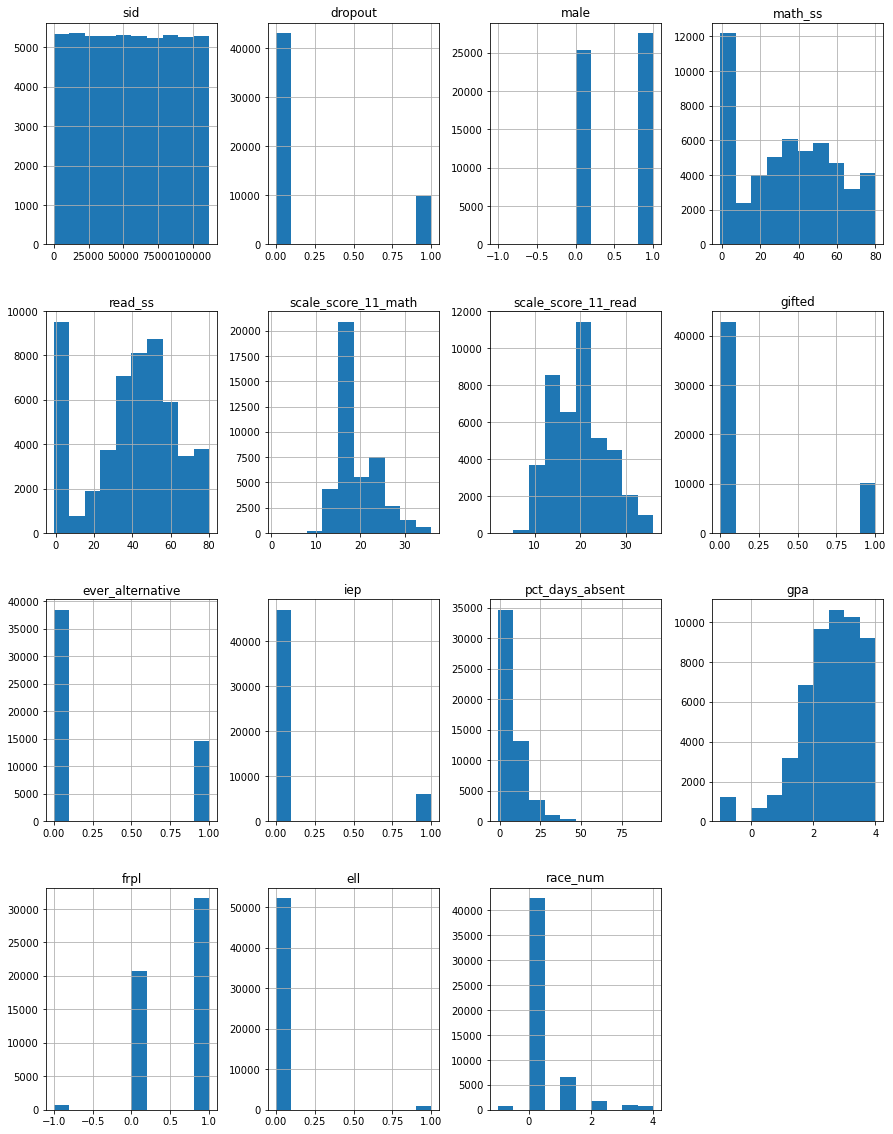

In [64]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
fs_dropouts.hist(ax = ax)

In [65]:
true_dropouts = fs_dropouts[fs_dropouts['dropout'] == 1]

(array([ 259.,    0.,    0.,    0.,    0., 2632.,    0.,    0.,    0.,
        6994.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

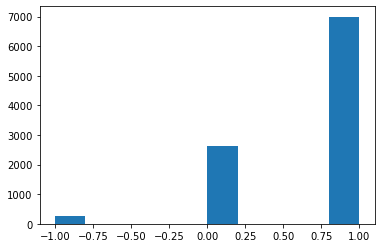

In [66]:
plt.hist(true_dropouts['frpl'])

In [67]:
grads = fs_dropouts[fs_dropouts['dropout'] != 1]

(array([  423.,     0.,     0.,     0.,     0., 18058.,     0.,     0.,
            0., 24566.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

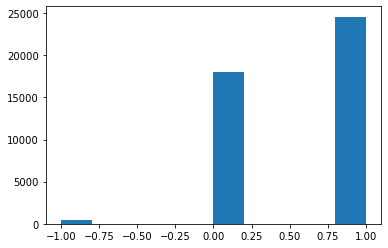

In [68]:
plt.hist(grads['frpl'])

In [69]:
frpl = fs_dropouts[fs_dropouts['frpl'] == 1]

(array([24566.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6994.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

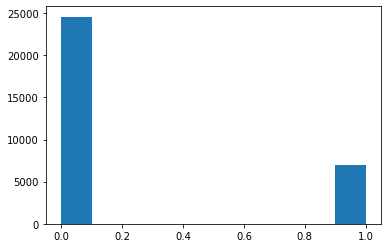

In [70]:
plt.hist(frpl['dropout']) #this one doesn't really mean much...

In [71]:
fs_dropouts[fs_dropouts['dropout'] == 1].describe()

,sid,dropout,male,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
count,9885.000000,9885.0,9885.000000,9885.000000,9885.000000,2507.000000,2501.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000
mean,55855.226201,1.0,0.595448,19.925746,26.334143,17.138811,17.470212,0.094284,0.446434,0.151947,14.155953,1.618265,0.681335,0.027921,0.384522
std,32400.644126,0.0,0.491448,22.351877,23.813702,3.795853,5.171887,0.292239,0.497148,0.358988,11.790239,1.170869,0.519180,0.164755,0.802757
min,12.000000,1.0,-1.000000,-1.000000,-1.000000,9.000000,6.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,27738.000000,1.0,0.000000,-1.000000,-1.000000,15.000000,14.000000,0.000000,0.000000,0.000000,5.622391,1.000000,0.000000,0.000000,0.000000
50%,55759.000000,1.0,1.000000,15.000000,29.000000,16.000000,16.000000,0.000000,0.000000,0.000000,11.665601,1.669500,1.000000,0.000000,0.000000
75%,84108.000000,1.0,1.000000,36.000000,45.000000,18.000000,21.000000,0.000000,1.000000,0.000000,19.543192,2.393000,1.000000,0.000000,1.000000
max,111988.000000,1.0,1.000000,80.000000,80.000000,36.000000,36.000000,1.000000,1.000000,1.000000,94.444443,4.000000,1.000000,1.000000,4.000000


In [72]:
true_dropouts

,sid,dropout,male,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
2,12,1,0.0,18.0,35.0,NaN,NaN,0,1,0,4.746706,0.330000,0.0,0,0
7,19,1,1.0,-1.0,-1.0,NaN,NaN,0,1,0,2.949704,-1.000000,0.0,0,0
11,30,1,0.0,55.0,66.0,NaN,NaN,0,1,0,13.785586,3.173095,1.0,0,0
22,54,1,0.0,72.0,66.0,NaN,NaN,1,1,0,7.451411,3.648700,0.0,0,0
24,59,1,0.0,24.0,45.0,NaN,NaN,0,0,1,24.603687,0.800000,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52915,111945,1,1.0,0.0,-1.0,14.0,11.0,0,1,0,9.280397,1.384733,1.0,0,1
52919,111952,1,0.0,0.0,48.0,NaN,NaN,0,1,1,6.518249,2.753710,1.0,0,1
52930,111972,1,1.0,-1.0,-1.0,NaN,NaN,0,0,0,29.800001,2.000000,0.0,0,0
52931,111973,1,0.0,0.0,-1.0,NaN,NaN,0,1,0,16.078279,-1.000000,1.0,0,0


In [73]:
grads

,sid,dropout,male,math_ss,read_ss,scale_score_11_math,scale_score_11_read,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
0,2,0,0.0,-1.0,-1.0,18.0,19.0,0,1,0,10.664031,1.230000,1.0,0,0
1,5,0,0.0,18.0,46.0,16.0,18.0,0,0,0,0.969005,2.822795,1.0,0,0
3,13,0,0.0,48.0,80.0,23.0,27.0,0,0,1,6.850071,2.985000,1.0,0,0
4,14,0,1.0,18.0,30.0,16.0,14.0,0,0,0,5.802631,2.118500,1.0,0,0
5,15,0,0.0,18.0,30.0,15.0,14.0,0,0,0,8.466276,1.705000,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52936,111982,0,0.0,45.0,39.0,20.0,19.0,0,0,0,15.894397,3.066000,1.0,0,0
52937,111984,0,1.0,34.0,44.0,16.0,15.0,0,1,1,9.833898,2.079800,1.0,0,1
52938,111985,0,0.0,23.0,51.0,16.0,20.0,1,1,0,2.291429,3.443500,0.0,0,0
52939,111986,0,1.0,4.0,18.0,15.0,8.0,0,0,1,7.766962,1.695142,1.0,0,0


(array([3726., 3319., 1742.,  635.,  270.,  106.,   41.,   25.,   10.,
          11.]),
 array([-1.       ,  8.5444443, 18.0888886, 27.6333329, 37.1777772,
        46.7222215, 56.2666658, 65.8111101, 75.3555544, 84.8999987,
        94.444443 ]),
 <BarContainer object of 10 artists>)

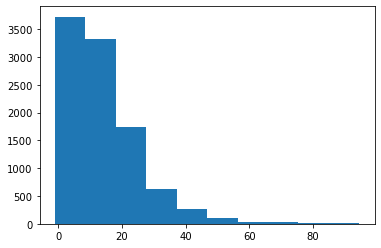

In [74]:
plt.hist(true_dropouts['pct_days_absent'])

(array([3.0904e+04, 9.7880e+03, 1.8090e+03, 3.7300e+02, 1.0900e+02,
        3.4000e+01, 1.1000e+01, 9.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([-1.       ,  8.5444443, 18.0888886, 27.6333329, 37.1777772,
        46.7222215, 56.2666658, 65.8111101, 75.3555544, 84.8999987,
        94.444443 ]),
 <BarContainer object of 10 artists>)

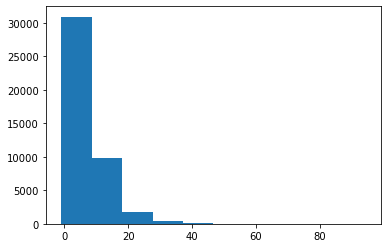

In [75]:
plt.hist(grads['pct_days_absent'])

(array([ 774.,    0.,  584., 1111., 1812., 1832., 1599., 1019.,  671.,
         483.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

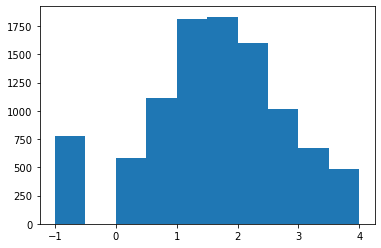

In [76]:
plt.hist(true_dropouts['gpa'])

(array([ 447.,    0.,   72.,  230., 1356., 5034., 8032., 9585., 9597.,
        8694.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

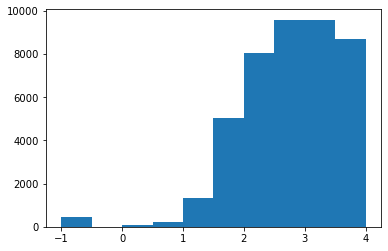

In [77]:
plt.hist(grads['gpa'])

In [78]:
dropouts['scale_score_6_math']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
52937   NaN
52938   NaN
52939   NaN
52940   NaN
52941   NaN
Name: scale_score_6_math, Length: 52942, dtype: float64

In [79]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52932 entries, 0 to 52941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sid                  52932 non-null  int64  
 1   dropout              52932 non-null  int64  
 2   male                 52932 non-null  float64
 3   math_ss              52932 non-null  float64
 4   read_ss              52932 non-null  float64
 5   scale_score_11_math  43035 non-null  float64
 6   scale_score_11_read  43015 non-null  float64
 7   gifted               52932 non-null  int64  
 8   ever_alternative     52932 non-null  int64  
 9   iep                  52932 non-null  int64  
 10  pct_days_absent      52932 non-null  float64
 11  gpa                  52932 non-null  float64
 12  frpl                 52932 non-null  float64
 13  ell                  52932 non-null  int64  
 14  race_num             52932 non-null  int64  
dtypes: float64(8), int64(7)
memory usage

In [80]:
dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sid                              52942 non-null  int64  
 1   sid_type                         52942 non-null  object 
 2   first_coop_code                  52942 non-null  object 
 3   first_dist_code                  52942 non-null  int64  
 4   first_hs_code                    52942 non-null  int64  
 5   first_dist_name                  52942 non-null  object 
 6   first_hs_name                    52942 non-null  object 
 7   first_hs_alt                     52942 non-null  int64  
 8   first_hs_urbanicity              52484 non-null  object 
 9   chrt_ninth                       52942 non-null  int64  
 10  male                             52931 non-null  float64
 11  race_ethnicity                   52257 non-null  object 
 12  frpl              